###### NAME: RAJASREE S
###### ROLL NO.: 215229147

### LAB15: TEXT DATASET CREATION AND DESIGN OF SIMPLE RNN FOR SENTIMENTAL ANALYSIS

#### STEPS

#### 1. IMPORT LIBRARIES

In [1]:
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding,SimpleRNN
from nltk.corpus import stopwords
nltk.download('stopwords')
",".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\2mscdsa18\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 2.Creation of Data

#### 3.Opening csv file

In [2]:
data = pd.read_csv("txtclass.csv", encoding= 'unicode_escape')
data.head()

,sentence,label
0,Change is the end result of all true learning.,1
1,An investment in knowledge pays the best inter...,1
2,"The roots of education are bitter, but the fru...",1
3,Education is what remains after one has forgot...,1
4,"The more that you read, the more things you wi...",1


#### 4.pre-processing the text

In [3]:
y = data['label']
X=[]
for review in data['sentence']:
    filtered_sentence = [w.lower() for w in review.split() if not w in STOPWORDS]
 #filtered_sentence = filtered_sentence.lower()
    X.append(filtered_sentence)
X = pd.Series(X)

#### 5.Dataset Preparation

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14,)
(6,)
(14,)
(6,)


In [6]:
train_token = Tokenizer(num_words=100,oov_token='<oov>')
train_token.fit_on_texts(X_train)
word_index = train_token.word_index
train_sequence = train_token.texts_to_sequences(X_train)
dict(list(word_index.items())[0:10])

{'<oov>': 1,
 '\x93education': 2,
 'without': 3,
 'knowledge': 4,
 'something': 5,
 'learner': 6,
 'education.': 7,
 'rather': 8,
 'know': 9,
 'memorize': 10}

In [7]:
vocab_ze = len(train_token.word_index) + 1
vocab_ze

127

In [8]:
train_sequence[3]

[34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 9,
 42,
 43,
 8,
 10,
 44,
 9,
 45,
 11,
 46,
 47,
 48,
 49,
 50,
 12,
 51]

In [9]:
train_padded = pad_sequences(train_sequence,maxlen=100,padding='post')

In [10]:
train_padded[2]

array([ 2,  3, 26, 27, 28, 29,  8, 30, 31, 32, 33,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [11]:
test_token = Tokenizer(num_words=500,oov_token='<oov>')
test_token.fit_on_texts(X_test)
test_index = test_token.word_index
test_sequence = test_token.texts_to_sequences(X_test)

In [12]:
test_padded = pad_sequences(test_sequence,maxlen=100,padding='post')

In [13]:
test_padded[4]

array([35, 36, 37, 38,  6, 39, 40,  6, 41, 42, 43,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

#### 6.Model Creation

In [14]:
model = Sequential()
# Embedding layer
model.add(Embedding(300,70,input_length=100))
model.add(SimpleRNN(70,activation='relu'))
model.add(Dense('1',activation='sigmoid'))

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 70)           21000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 70)                9870      
                                                                 
 dense (Dense)               (None, 1)                 71        
                                                                 
Total params: 30,941
Trainable params: 30,941
Non-trainable params: 0
_________________________________________________________________


In [17]:
history=model.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
1/1 - 1s - loss: 0.6932 - accuracy: 0.5000 - 717ms/epoch - 717ms/step
Epoch 2/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 7ms/epoch - 7ms/step
Epoch 3/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 9ms/epoch - 9ms/step
Epoch 4/10
1/1 - 0s - loss: 0.6931 - accuracy: 0.5000 - 8ms/epoch - 8ms/step
Epoch 5/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 7ms/epoch - 7ms/step
Epoch 6/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 8ms/epoch - 8ms/step
Epoch 7/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 8ms/epoch - 8ms/step
Epoch 8/10
1/1 - 0s - loss: 0.6931 - accuracy: 0.5000 - 7ms/epoch - 7ms/step
Epoch 9/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 7ms/epoch - 7ms/step
Epoch 10/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 8ms/epoch - 8ms/step


In [18]:
model.evaluate(test_padded,y_test)

1/1 [==============================] - 0s 148ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931506991386414, 0.5]

In [19]:
text = ['Education is what remains after one has forgotten what one has learned in school.']
#sent = [w.lower() for w in text.split() if not w in STOPWORDS]
trail_token = Tokenizer()
trail_token.fit_on_texts(text)
#word_index = trail_token.word_index
trail_seq = trail_token.texts_to_sequences(text)
#dict(list(word_index.items())[0:10])
trail_pad = pad_sequences(trail_seq,maxlen=100,padding='post')


In [20]:
trail_pad


array([[ 4,  5,  1,  6,  7,  2,  3,  8,  1,  2,  3,  9, 10, 11,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0]])

In [21]:
res = model.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

1/1 [==============================] - 0s 105ms/step
[[0.4986892]] positive


C:\Users\2mscdsa18\AppData\Local\Temp\ipykernel_712\1535703611.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])


In [22]:
model1 = Sequential()
# Embedding layer
model1.add(Embedding(5000,64,input_length=100))
model1.add(SimpleRNN(32,activation='tanh'))
model1.add(Embedding(5000,32,input_length=100))
model1.add(SimpleRNN(32,activation='tanh' ))
model1.add(Dense('1',activation='sigmoid'))

In [23]:
model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 embedding_2 (Embedding)     (None, 32, 32)            160000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 485,217
Trainable params: 485,217
Non-trainable params: 0
_________________________________________________________________


In [24]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history1=model1.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
1/1 - 1s - loss: 0.6941 - accuracy: 0.5000 - 725ms/epoch - 725ms/step
Epoch 2/10
1/1 - 0s - loss: 0.6931 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
Epoch 3/10
1/1 - 0s - loss: 0.6935 - accuracy: 0.5000 - 6ms/epoch - 6ms/step
Epoch 4/10
1/1 - 0s - loss: 0.6936 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
Epoch 5/10
1/1 - 0s - loss: 0.6934 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
Epoch 6/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
Epoch 7/10
1/1 - 0s - loss: 0.6931 - accuracy: 0.5000 - 6ms/epoch - 6ms/step
Epoch 8/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
Epoch 9/10
1/1 - 0s - loss: 0.6933 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
Epoch 10/10
1/1 - 0s - loss: 0.6933 - accuracy: 0.5000 - 5ms/epoch - 5ms/step


In [26]:
model1.evaluate(test_padded,y_test)


1/1 [==============================] - 0s 277ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932557225227356, 0.5]

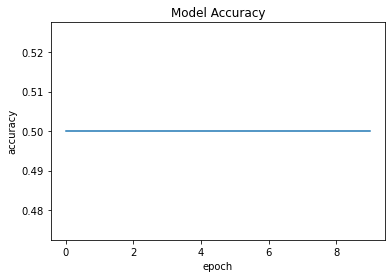

In [27]:
plt.plot(history1.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

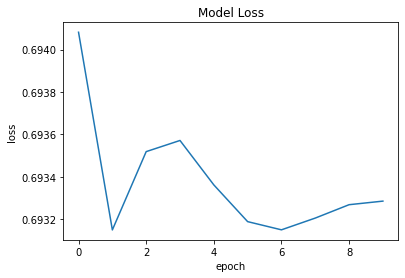

In [28]:
plt.plot(history1.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [29]:
res = model1.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

1/1 [==============================] - 0s 147ms/step
[[0.49263272]] positive


C:\Users\2mscdsa18\AppData\Local\Temp\ipykernel_712\2701450631.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])


In [30]:
model2 = Sequential()
# Embedding layer
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='tanh'))
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='relu' ))
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='tanh' ))
model2.add(Dense('1',activation='sigmoid'))

In [31]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 128)          512000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 64)                12352     
                                                                 
 embedding_4 (Embedding)     (None, 64, 128)           512000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 64)                12352     
                                                                 
 embedding_5 (Embedding)     (None, 64, 128)           512000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_2 (Dense)             (None, 1)                

In [32]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history2=model2.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
1/1 - 1s - loss: 0.6935 - accuracy: 0.5000 - 821ms/epoch - 821ms/step
Epoch 2/10
1/1 - 0s - loss: 0.6980 - accuracy: 0.5000 - 11ms/epoch - 11ms/step
Epoch 3/10
1/1 - 0s - loss: 0.6936 - accuracy: 0.5000 - 10ms/epoch - 10ms/step
Epoch 4/10
1/1 - 0s - loss: 0.6942 - accuracy: 0.5000 - 10ms/epoch - 10ms/step
Epoch 5/10
1/1 - 0s - loss: 0.6947 - accuracy: 0.5000 - 9ms/epoch - 9ms/step
Epoch 6/10
1/1 - 0s - loss: 0.6941 - accuracy: 0.5000 - 10ms/epoch - 10ms/step
Epoch 7/10
1/1 - 0s - loss: 0.6935 - accuracy: 0.5000 - 10ms/epoch - 10ms/step
Epoch 8/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 9ms/epoch - 9ms/step
Epoch 9/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 10ms/epoch - 10ms/step
Epoch 10/10
1/1 - 0s - loss: 0.6933 - accuracy: 0.5000 - 10ms/epoch - 10ms/step


In [34]:
model2.evaluate(test_padded,y_test)

1/1 [==============================] - 0s 243ms/step - loss: 0.6933 - accuracy: 0.5000


[0.69331955909729, 0.5]

In [35]:
res = model2.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

1/1 [==============================] - 0s 204ms/step
[[0.50928307]] positive


C:\Users\2mscdsa18\AppData\Local\Temp\ipykernel_712\479605851.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])
